#  PROJECT: The Complete Coffee Shop Analysis

In [14]:
#  Importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
# Create our coffee shop dataset
np.random.seed(42)  # For reproducible results

# Daily sales data
daily_data = pd.DataFrame({
    'date': pd.date_range('2023-01-01', '2023-12-31', freq='D'),
    'total_sales': np.random.normal(1000, 200, 365),           # Daily revenue
    'coffee_sold': np.random.normal(300, 50, 365),             # Cups of coffee
    'temperature': np.random.normal(20, 8, 365),               # Daily temperature
    'day_of_week': pd.date_range('2023-01-01', '2023-12-31', freq='D').strftime('%A')
})

# Add some realistic patterns
# More sales on weekends
daily_data.loc[daily_data['day_of_week'].isin(['Saturday', 'Sunday']), 'total_sales'] *= 1.3
daily_data.loc[daily_data['day_of_week'].isin(['Saturday', 'Sunday']), 'coffee_sold'] *= 1.3

# Less sales on hot days
daily_data.loc[daily_data['temperature'] > 25, 'coffee_sold'] *= 0.8

# Product sales data
products_data = pd.DataFrame({
    'product': ['Latte', 'Espresso', 'Cappuccino', 'Americano', 'Mocha',
                'Tea', 'Croissant', 'Muffin', 'Sandwich'],
    'units_sold': np.random.normal(100, 20, 9),
    'profit_margin': np.random.uniform(0.15, 0.35, 9),
    'category': ['Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee',
                 'Tea', 'Pastry', 'Pastry', 'Food']
})

In [36]:
daily_data.head(10)

,date,total_sales,coffee_sold,temperature,day_of_week
0,2023-01-01,1429.145680,363.920669,21.566762,Sunday
1,2023-01-02,972.347140,311.204624,12.173018,Monday
2,2023-01-03,1129.537708,300.629620,23.266022,Tuesday
3,2023-01-04,1304.605971,304.883805,6.379331,Wednesday
4,2023-01-05,953.169325,209.079609,28.233245,Thursday
5,2023-01-06,953.172609,301.225509,23.780780,Friday
6,2023-01-07,1710.595332,422.369889,22.048238,Saturday
7,2023-01-08,1499.533030,387.459468,27.861528,Sunday
8,2023-01-09,906.105123,278.370833,33.323796,Monday
9,2023-01-10,1108.512009,326.127298,28.114961,Tuesday


### Producing a data visualization analysis to help the coffee business

#### Part 1 - Daily and Weekly Patterns

***Line plot that show daily sales over time***

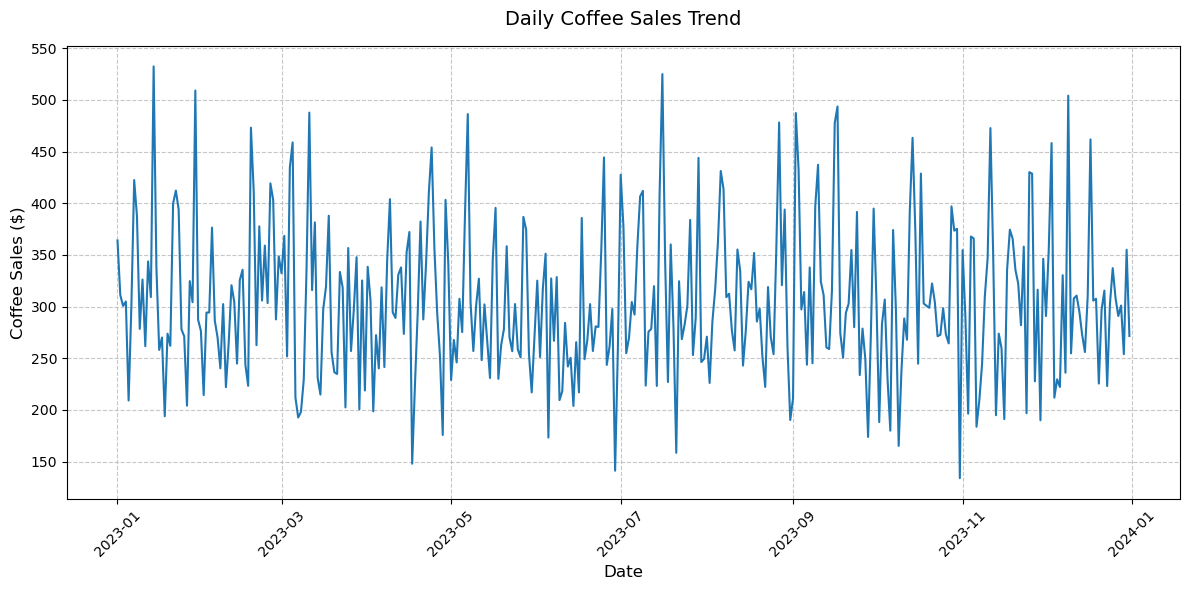

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['coffee_sold'],linestyle='-', color='#1f77b4')
plt.title("Daily Coffee Sales Trend", fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Coffee Sales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***The highest and lowest sales per days***

In [20]:
max_sales = daily_data['coffee_sold'].max()
min_sales = daily_data['coffee_sold'].min()

print(f"Maximum sales: {max_sales}")
print(f"Minimum sales: {min_sales}")

Maximum sales: 532.3371906591487
Minimum sales: 133.96120766427953


***Bar plot that show average sales by day of week***

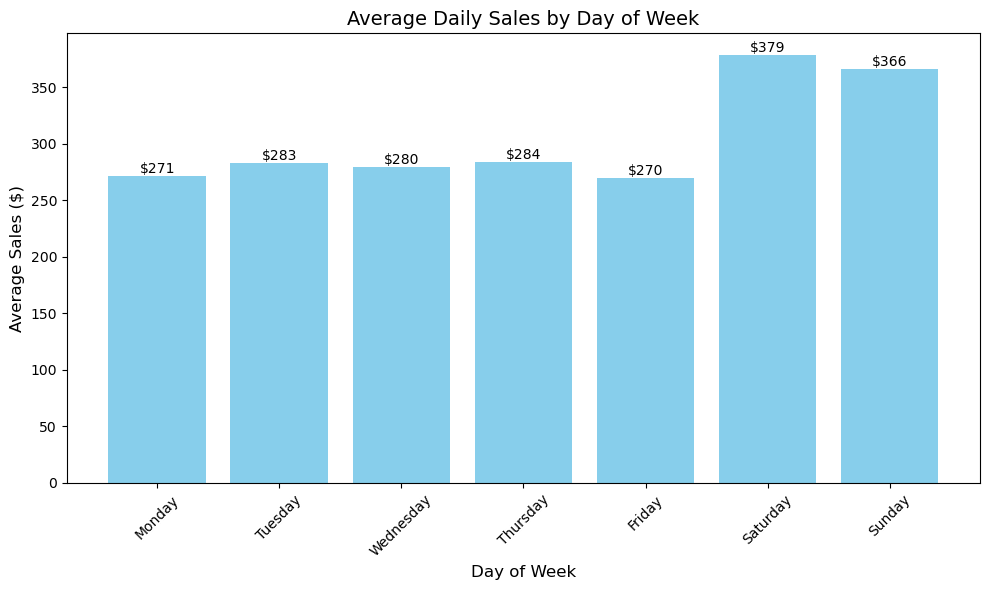

In [22]:
# Calculate average sales by day of week
weekly_sales = daily_data.groupby('day_of_week')['coffee_sold'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_sales.index, weekly_sales.values, color='skyblue')
plt.title('Average Daily Sales by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Sales ($)', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Weekends different from weekdays***

In [24]:
# average weekdays sales
avg_weekdays = weekly_sales.values[0:5].mean()
# average weekend sales
avg_weekends = weekly_sales.values[5:7].mean()
avg_sales = avg_weekends - avg_weekdays
print(f'The weekends different from weekdays is {avg_sales}')

The weekends different from weekdays is 94.7506268086704


In [78]:
weekly_sales.values[5:7]

array([378.52727558, 365.80950343])

***Heatmap that show sales by hour and day of week***

***It is assumed that the sale of coffee takes place between 6 a.m. and 8 p.m. (15 hours)***

In [26]:
np.random.seed(42)  # For reproducible results
 
# Generation of hourly data
hourly_data = []
for _, row in daily_data.iterrows():
    for hour in range(6, 21):  # Simulate sales from 6 a.m. to 8 p.m.
        hourly_sales = np.random.normal(row['coffee_sold'] / 15, 5)  # Sales Breakdown
        hourly_data.append([row['day_of_week'], hour, max(0, hourly_sales)])  # No negative sales

In [28]:
# Creating the DataFrame with Time Data
hourly_sales_df = pd.DataFrame(hourly_data, columns=['day_of_week', 'hour', 'coffee_sold'])

# Turn days into ordered categories
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_sales_df['day_of_week'] = pd.Categorical(hourly_sales_df['day_of_week'], categories=day_order, ordered=True)

pivot_table = hourly_sales_df.pivot_table(index='day_of_week', columns='hour', values='coffee_sold', aggfunc='mean',  observed=False)

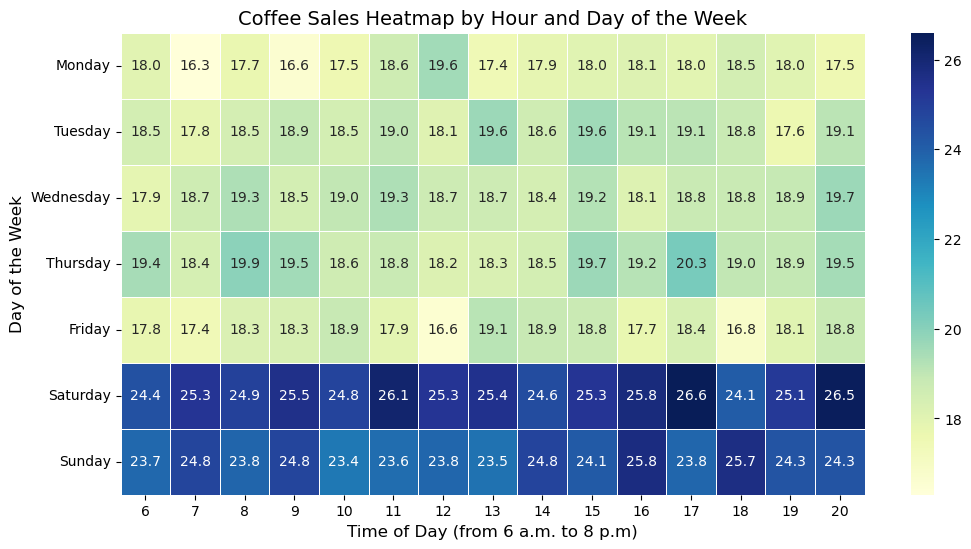

In [30]:
# Creating the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt =".1f", linewidths=0.5)

plt.title("Coffee Sales Heatmap by Hour and Day of the Week", fontsize=14)
plt.xlabel("Time of Day (from 6 a.m. to 8 p.m)", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()

----
Peak hours are Saturday and Sunday hours (6 a.m. to 8 p.m.).
We recommend having a large amount for staffingl on Saturday and Sunda.y

### Part 2: Product Performance and External Factor Impact

***Bar chart that show total sales by product***

In [152]:
products_data

,product,units_sold,profit_margin,category
0,Latte,98.385668,0.177930,Coffee
1,Espresso,101.572704,0.155995,Coffee
2,Cappuccino,60.035986,0.211586,Coffee
3,Americano,118.326553,0.290936,Coffee
4,Mocha,106.929770,0.190371,Coffee
5,Tea,119.960202,0.284686,Tea
6,Croissant,42.074892,0.343982,Pastry
7,Muffin,141.767494,0.168780,Pastry
8,Sandwich,97.208207,0.284520,Food


In [398]:
# Sort the 'units_sold' column in ascending order
products_data_sorted = products_data.sort_values(by='units_sold').reset_index()

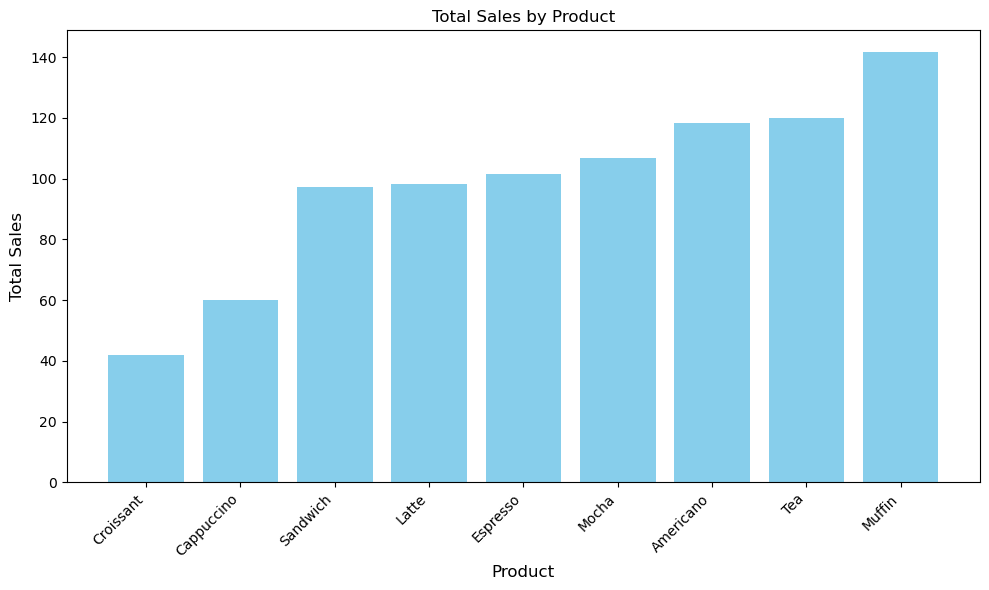

In [400]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(products_data_sorted['product'], products_data_sorted['units_sold'], color='skyblue')
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.title("Total Sales by Product", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The top three products are Muffin, Tea and Americano.
The three least sold are Croissant, Cappuccino and Sandwich.

### Profit for each product and visualization comparing sales volume vs. profit margin



In [402]:
# Calculate profit for each product
products_data_sorted['profit'] = products_data_sorted['units_sold'] * products_data_sorted['profit_margin']

In [404]:
# Calculate profit margin
products_data_sorted['profit_margin_percentage'] = products_data_sorted['profit_margin'] * 100

In [406]:
# Print the products data with the calculated profit and profit margin
products_data_sorted.head()

,index,product,units_sold,profit_margin,category,profit,profit_margin_percentage
0,6,Croissant,42.074892,0.343982,Pastry,14.473023,34.398241
1,2,Cappuccino,60.035986,0.211586,Coffee,12.702773,21.158599
2,8,Sandwich,97.208207,0.284520,Food,27.657720,28.452042
3,0,Latte,98.385668,0.177930,Coffee,17.505787,17.793025
4,1,Espresso,101.572704,0.155995,Coffee,15.844805,15.599472


In [408]:
# Identify the miximal and the minimal marginal profit 
max_idx = products_data_sorted['profit_margin_percentage'].idxmax()
min_idx = products_data_sorted['profit_margin_percentage'].idxmin()

max_product = products_data_sorted['product'][max_idx]
max_value = products_data_sorted['profit_margin_percentage'][max_idx]

min_product = products_data_sorted['product'][min_idx]
min_value = products_data_sorted['profit_margin_percentage'][min_idx]


In [410]:
max_idx

0

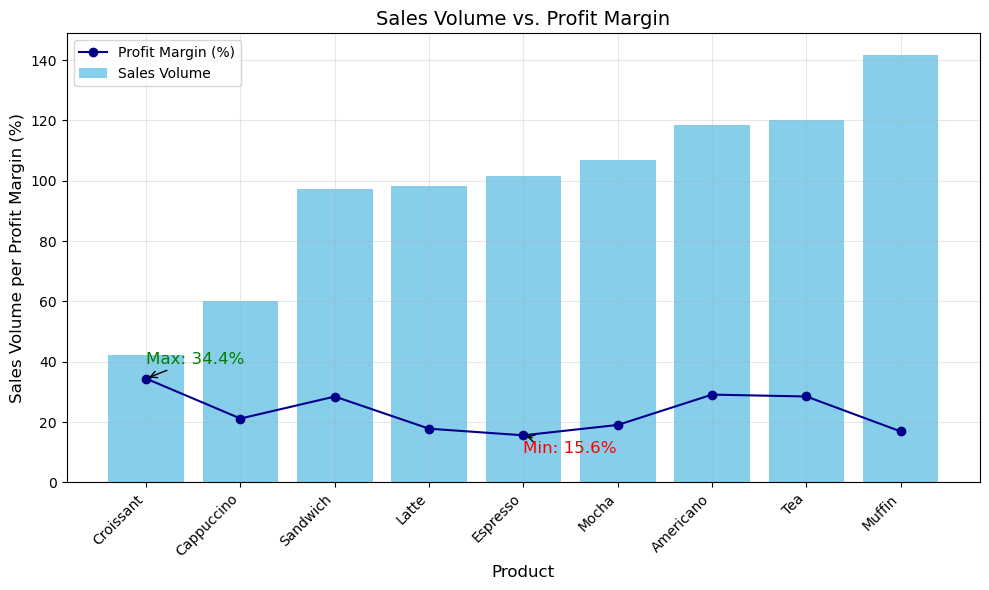

In [435]:
# Visualization: Sales Volume vs. Profit Margin
plt.figure(figsize=(10, 6))
plt.bar(products_data_sorted['product'], products_data_sorted['units_sold'], label='Sales Volume', color='skyblue')
plt.plot(products_data_sorted['product'], products_data_sorted['profit_margin_percentage'], marker='o', linestyle='-', color='darkblue', label='Profit Margin (%)')

# Annotation of maximum
plt.annotate(f'Max: {max_value:.1f}%', 
             xy=(max_idx, max_value), xytext=(max_idx, max_value + 5),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12, color='green')

# Annotation of minimum
plt.annotate(f'Min: {min_value:.1f}%', 
             xy=(min_idx , min_value), xytext=(min_idx, min_value - 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

plt.xlabel("Product", fontsize=12)
plt.ylabel("Sales Volume per Profit Margin (%)", fontsize=12)
plt.title("Sales Volume vs. Profit Margin", fontsize=14)
plt.grid(True, alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Generally, Espresso gives a lower profit than others. While Croissant gives a higher profit than others.

### Scatter plot of temperature vs. sales

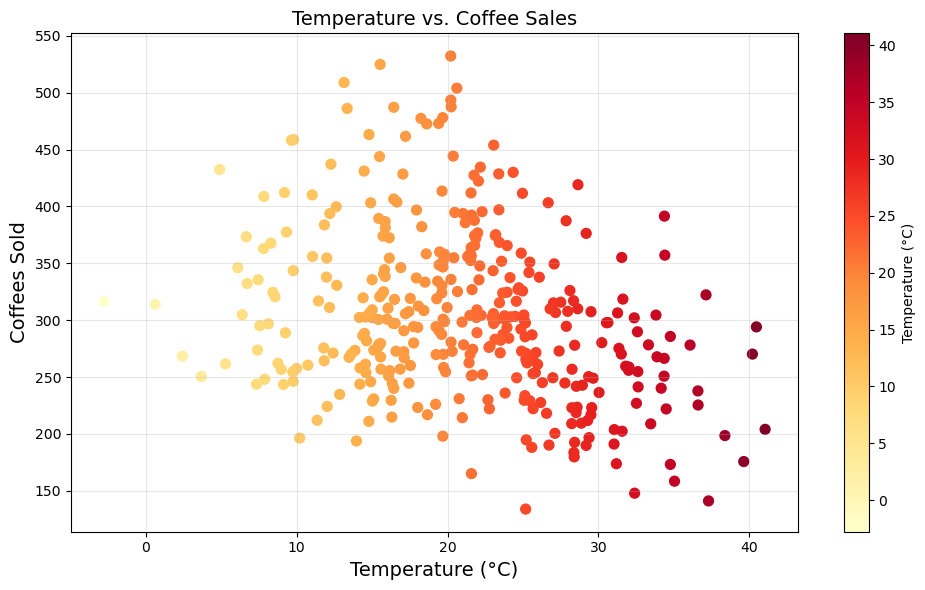

In [354]:
plt.figure(figsize=(10,6))
plt.scatter(daily_data['temperature'], daily_data['coffee_sold'],c=daily_data['temperature'],
           cmap='YlOrRd', s=50)
plt.title('Temperature vs. Coffee Sales', fontsize=14)
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Coffees Sold',fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Hot days are days when there is less sales than on cold days.

### Visualization examining the temperature vs. time of day and coffe sales

Nous allons utiliser les ventes par heure de vente que nous avons au dessus.

In [308]:
hourly_sales_df =  hourly_sales_df.rename(columns = {'coffee_sold' : 'hour_coffee_sold'})

In [310]:
time_sales_merge = hourly_sales_df.merge(daily_data,
                                              how='left', 
                                              on=['day_of_week']  # Liste des colonnes à utiliser comme clés
                                             )


In [315]:
time_sales_merge_filter = time_sales_merge.dropna()

In [317]:
# Add the temperature data
time_sales_merge_filter.loc[time_sales_merge_filter['temperature'] > 25, 'hour_coffee_sold'] *= 0.8


In [319]:
time_sales_merge_filter.head()

,day_of_week,hour,hour_coffee_sold,date,total_sales,coffee_sold,temperature,temp_range
0,Sunday,6,26.744949,2023-01-01,1429.145680,363.920669,21.566762,"(15, 25]"
1,Sunday,6,21.395959,2023-01-08,1499.533030,387.459468,27.861528,"(25, 40]"
2,Sunday,6,26.744949,2023-01-15,851.521364,337.460611,24.141272,"(15, 25]"
3,Sunday,6,26.744949,2023-01-22,1241.298162,412.214138,9.186523,"(0, 15]"
4,Sunday,6,26.744949,2023-01-29,1143.833941,509.044820,13.133138,"(0, 15]"


In [329]:
# Average sales per time
time_sales = (time_sales_merge_filter.groupby(['hour','temperature'])['hour_coffee_sold'].mean()).reset_index()

In [331]:
time_sales.head()

,hour,temperature,hour_coffee_sold
0,6,0.608965,18.500864
1,6,2.409552,23.747327
2,6,3.666121,18.500864
3,6,4.883674,23.747327
4,6,5.273006,17.886890


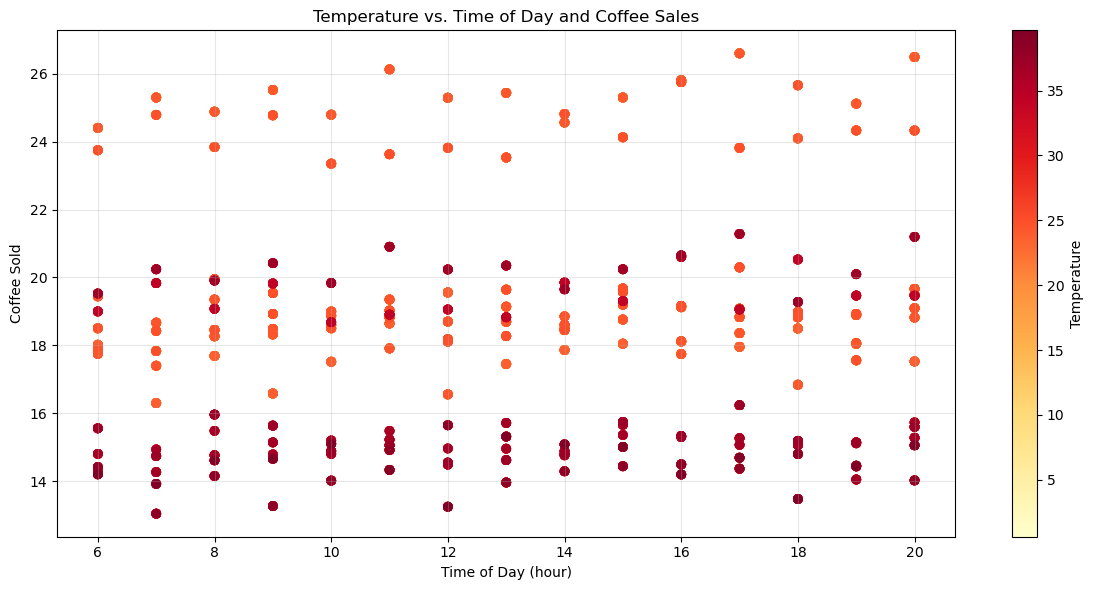

In [352]:
plt.figure(figsize=(12,6))
plt.scatter(time_sales['hour'], time_sales['hour_coffee_sold'], c=time_sales['temperature'], cmap='YlOrRd') # c parameter for color mapping
plt.title("Temperature vs. Time of Day and Coffee Sales")
plt.xlabel('Time of Day (hour)')
plt.ylabel('Coffee Sold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.colorbar(label='Temperature') #Add a colorbar with a label
plt.show()

###  Dashboard and Recommendations

In [446]:
products_data_sorted

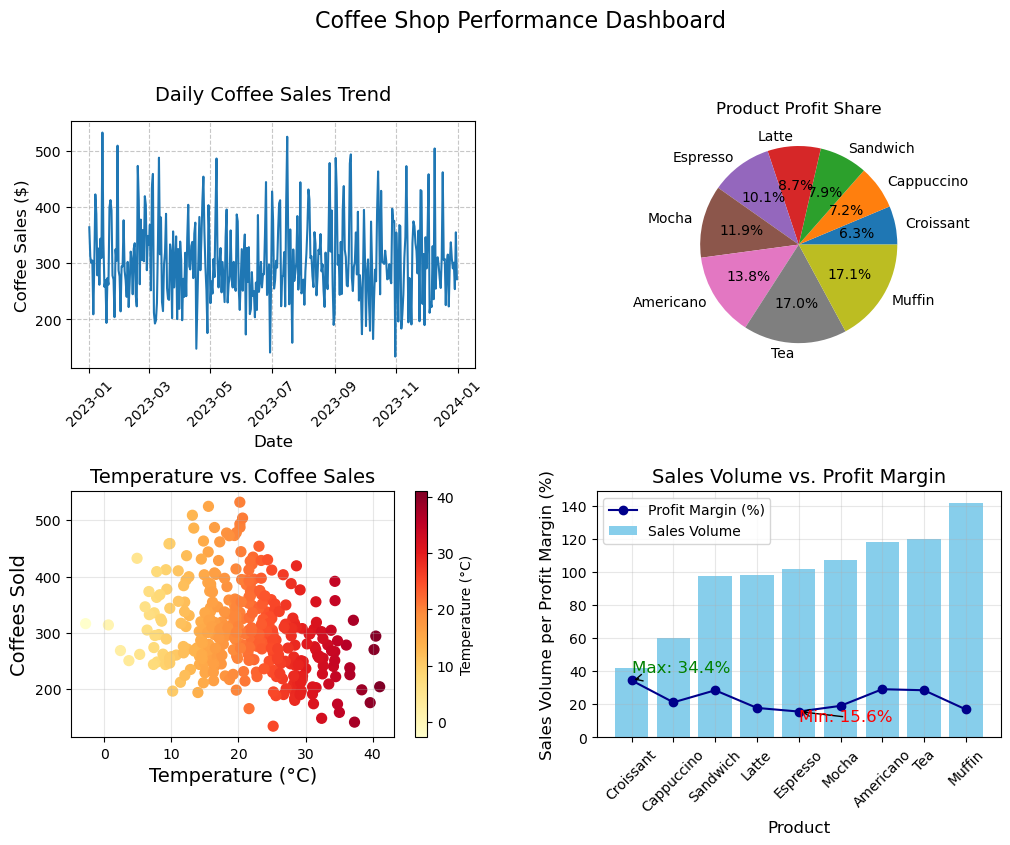

In [479]:
# Create a dashboard with multiple plots
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

# Daily sales trend
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(daily_data['date'], daily_data['coffee_sold'],linestyle='-', color='#1f77b4')
ax1.set_title("Daily Coffee Sales Trend", fontsize=14, pad=15)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Coffee Sales ($)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=45)

# Product profitability
ax2 = fig.add_subplot(gs[0, 1])
sizes = np.sort(products_data_sorted['units_sold'] * products_data_sorted['profit_margin'])
ax2.pie(sizes, labels=products_data_sorted['product'], autopct='%1.1f%%')
ax2.set_title('Product Profit Share')

# Temperature vs sales
ax3 = fig.add_subplot(gs[1, 0])
scatter = ax3.scatter(daily_data['temperature'], daily_data['coffee_sold'],c=daily_data['temperature'],
           cmap='YlOrRd', s=50)
ax3.set_title('Temperature vs. Coffee Sales', fontsize=14)
ax3.set_xlabel('Temperature (°C)', fontsize=14)
ax3.set_ylabel('Coffees Sold',fontsize=14)
ax3.grid(True, alpha=0.3)
cbar = fig.colorbar(scatter, ax=ax3)
cbar.set_label('Temperature (°C)')

# Weekly pattern
ax4 = fig.add_subplot(gs[1, 1])
ax4.bar(products_data_sorted['product'], products_data_sorted['units_sold'], label='Sales Volume', color='skyblue')
ax4.plot(products_data_sorted['product'], products_data_sorted['profit_margin_percentage'], marker='o', linestyle='-', color='darkblue', label='Profit Margin (%)')
# Annotation of maximum
ax4.annotate(f'Max: {max_value:.1f}%', 
             xy=(max_idx, max_value), xytext=(max_idx, max_value + 5),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=12, color='green')
# Annotation of minimum
ax4.annotate(f'Min: {min_value:.1f}%', 
             xy=(min_idx , min_value), xytext=(min_idx, min_value - 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')
ax4.set_xlabel("Product", fontsize=12)
ax4.set_ylabel("Sales Volume per Profit Margin (%)", fontsize=12)
ax4.set_title("Sales Volume vs. Profit Margin", fontsize=14)
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.savefig('subplots_dashboard.png', dpi=300, bbox_inches='tight')
plt.suptitle('Coffee Shop Performance Dashboard', fontsize=16, y=1.02)
plt.show()

### PROPOSAL FOR A RECOMMENDATION

It will be ideal to stock up on more "Americano" and "Mocha" coffee on weekends when it is cold.